In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [3]:
df=pd.read_csv("Sleep_health_and_lifestyle_dataset[1].csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
#DATA PREPROCESSING PART 1

In [5]:
#CHECK THE NUMBER OF UNIQUE VALUE FROM ALL OF THE OBJECT DATATYPE
df.select_dtypes(include='object').nunique()

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     2
dtype: int64

In [6]:
#drop identifier column like 'person id'
df.drop(columns='Person ID',inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
#split Blood Pressure Column into 2 column 

In [8]:
df[['Blood Pressure 1', 'Blood Pressure 2']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure 1,Blood Pressure 2
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [9]:
#drop blood pressure column 
df.drop(columns='Blood Pressure',inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure 1,Blood Pressure 2
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [10]:
#check BMI Category Unique Value

In [11]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [12]:
#replace 'normal weight' with 'normal' in 'BMI Category' column
df['BMI Category']=df['BMI Category'].replace('Normal Weight','Normal')
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [13]:
#check occupation unique values

In [14]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

C:\Users\mohit\AppData\Local\Temp\ipykernel_10720\3035767501.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotate x-axis labels
C:\Users\mohit\AppData\Local\Temp\ipykernel_10720\3035767501.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotate x-axis labels
C:\Users\mohit\AppData\Local\Temp\ipykernel_10720\3035767501.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotate x-axis labels


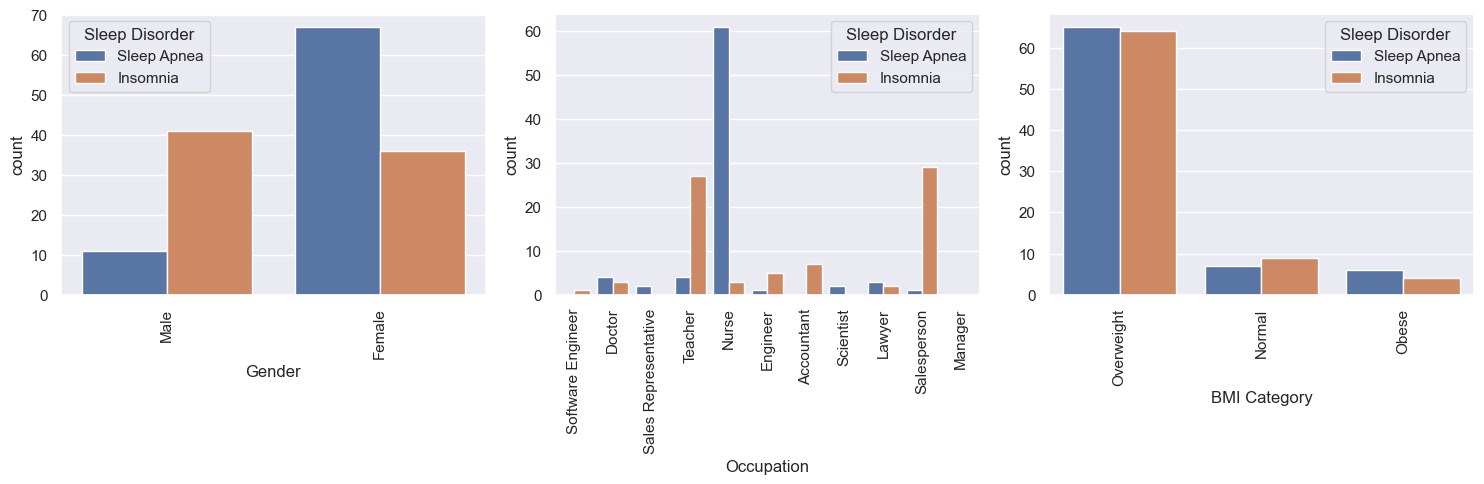

In [15]:
#exploratory data analysis
#list of categories variables to plot
# List of categorical variables to plot
# List of categorical variables to plot
cat_vars = ['Gender', 'Occupation', 'BMI Category']

# Create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  

# Flatten axs for easy iteration
axs = axs.flatten()

# Create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Sleep Disorder', data=df, ax=axs[i])  # Fixed x=var
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotate x-axis labels

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

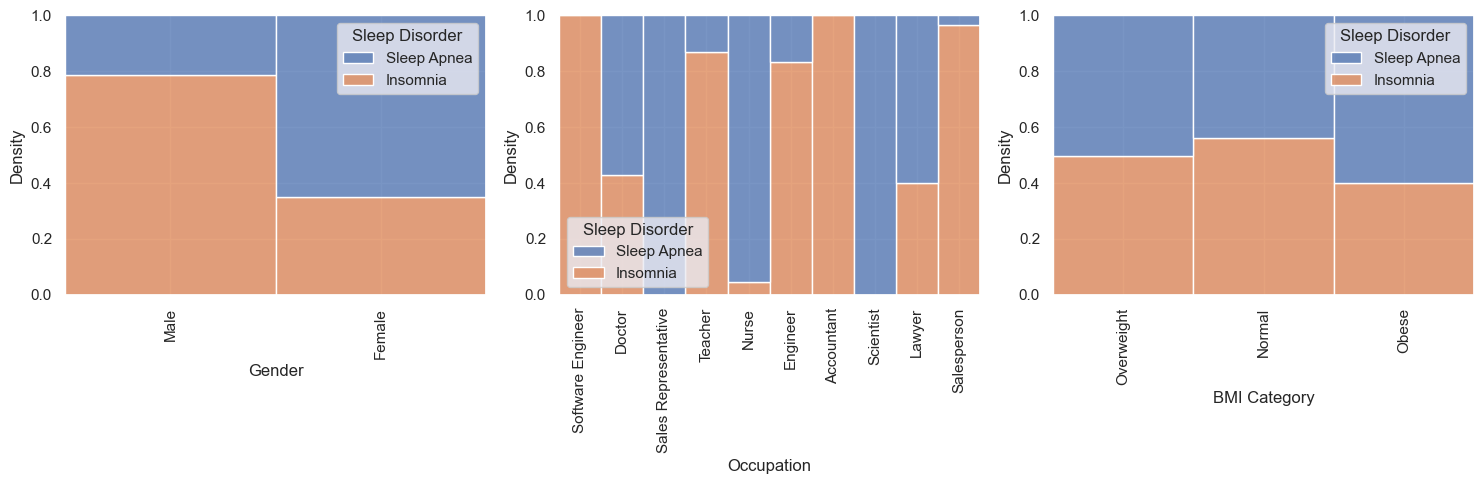

In [16]:
import warnings
warnings.filterwarnings('ignore')
#get list of categorical variables
cat_vars = ['Gender', 'Occupation', 'BMI Category']

# Create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  

# Flatten axs for easy iteration
axs = axs.flatten()
#create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Sleep Disorder', data=df, ax=axs[i],multiple="fill",kde=False,element="bars",fill=True,stat="density")
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [17]:
print(df.columns)  # Check available columns


Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Blood Pressure 1',
       'Blood Pressure 2'],
      dtype='object')


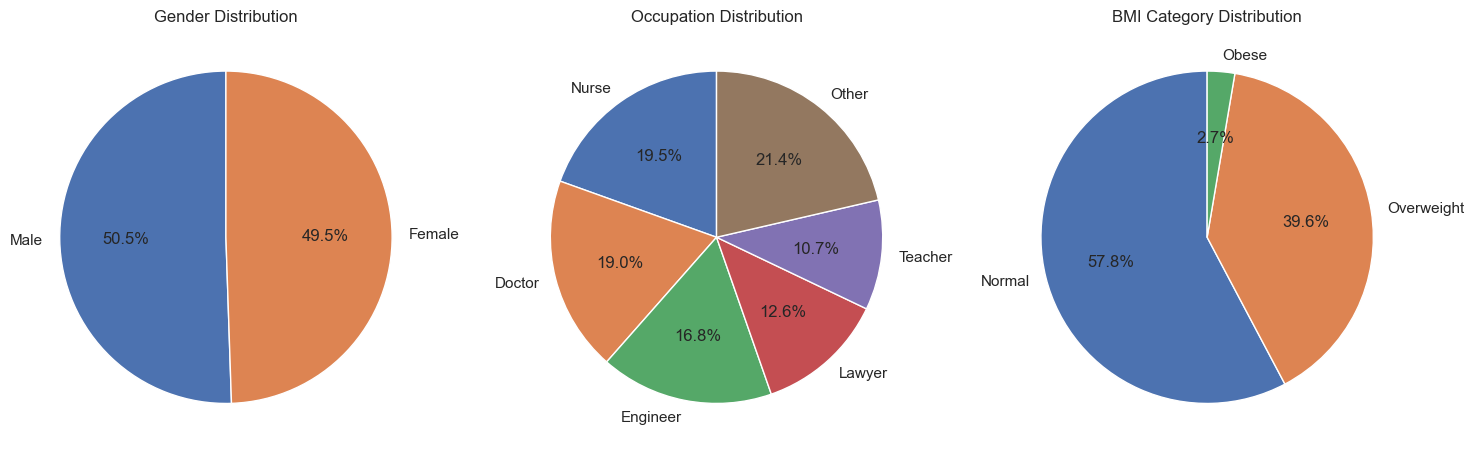

In [18]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Gender', 'Occupation', 'BMI Category']

# Create a figure and axes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts.iloc[:max_categories]
            cat_counts_other = pd.Series(cat_counts.iloc[max_categories:].sum(), index=['Other'])
            cat_counts = pd.concat([cat_counts_top, cat_counts_other])

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust layout between subplots
fig.tight_layout()

# Show the plot
plt.show()
        

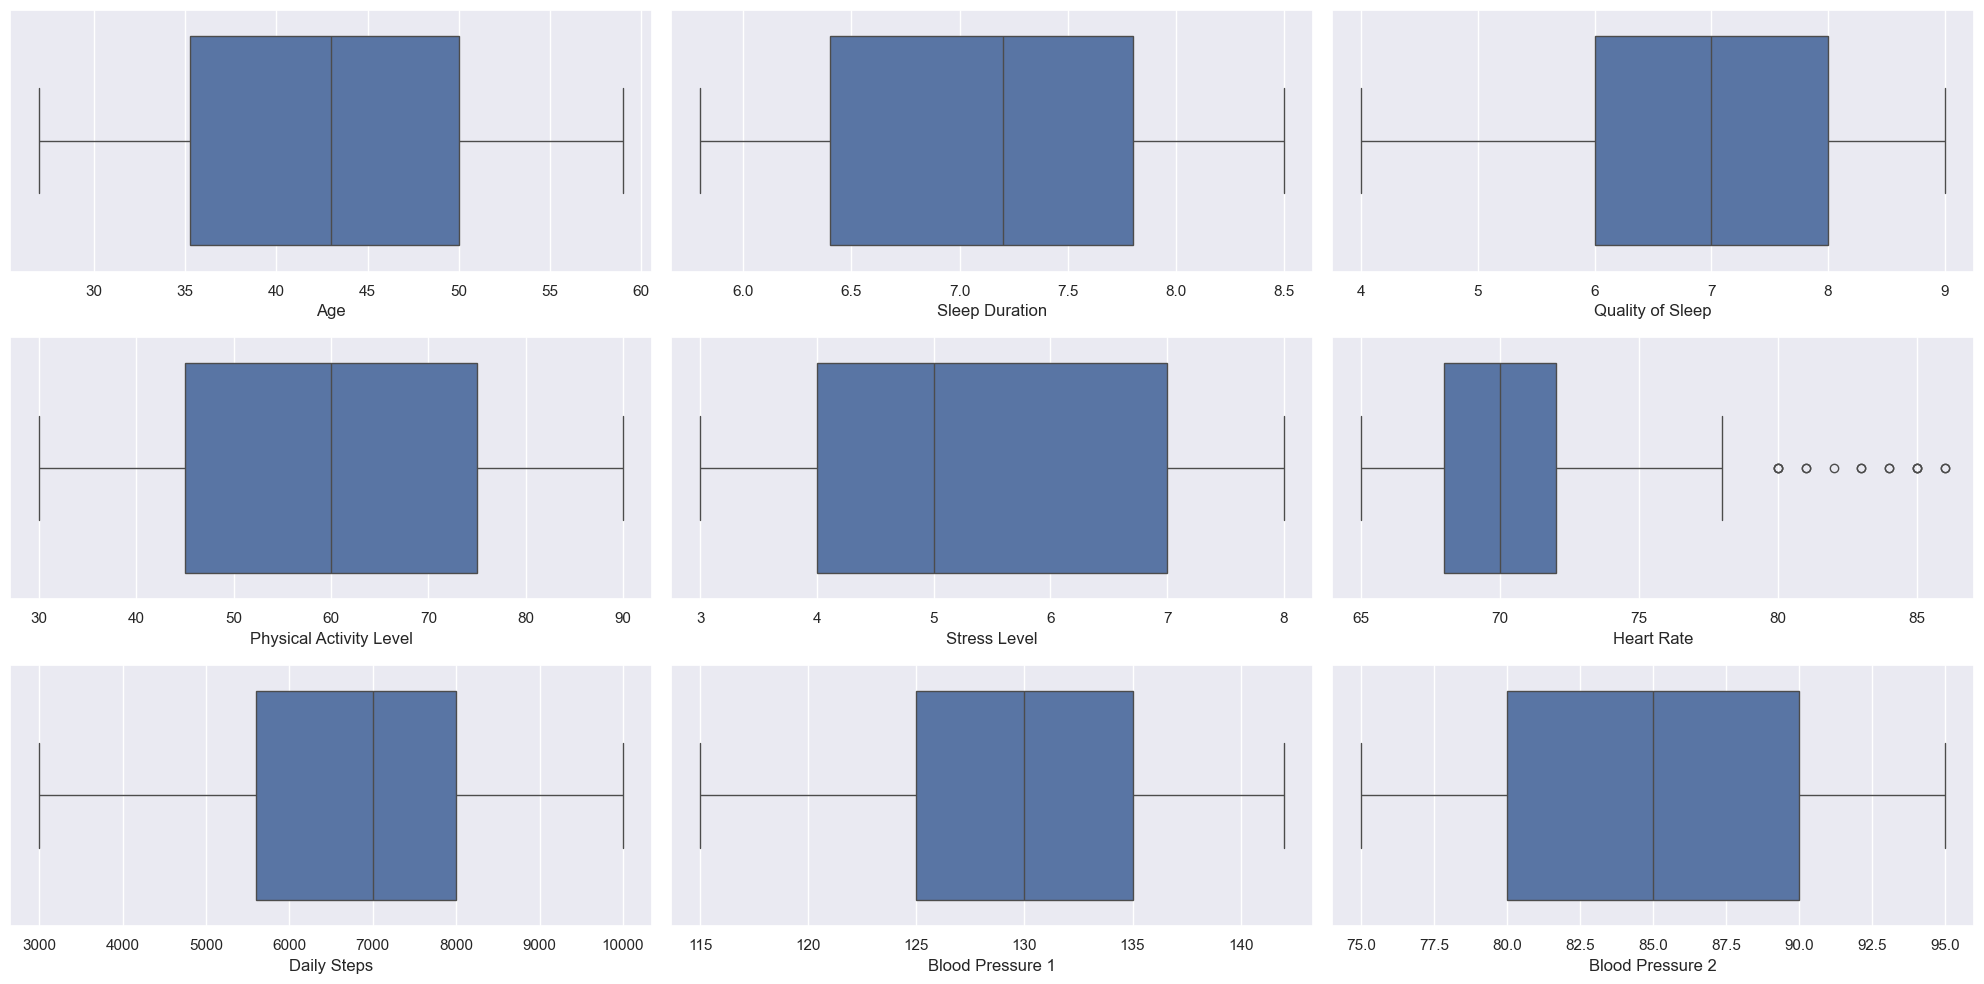

In [19]:
# Define numerical variables for visualization
num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
            'Stress Level', 'Heart Rate', 'Daily Steps', 'Blood Pressure 1', 'Blood Pressure 2']

# Create subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()  # Flatten for easy iteration

# Generate boxplots for each numerical variable
for i, var in enumerate(num_vars):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        sns.boxplot(x=df[var], data=df, ax=axs[i])

# Adjust layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()

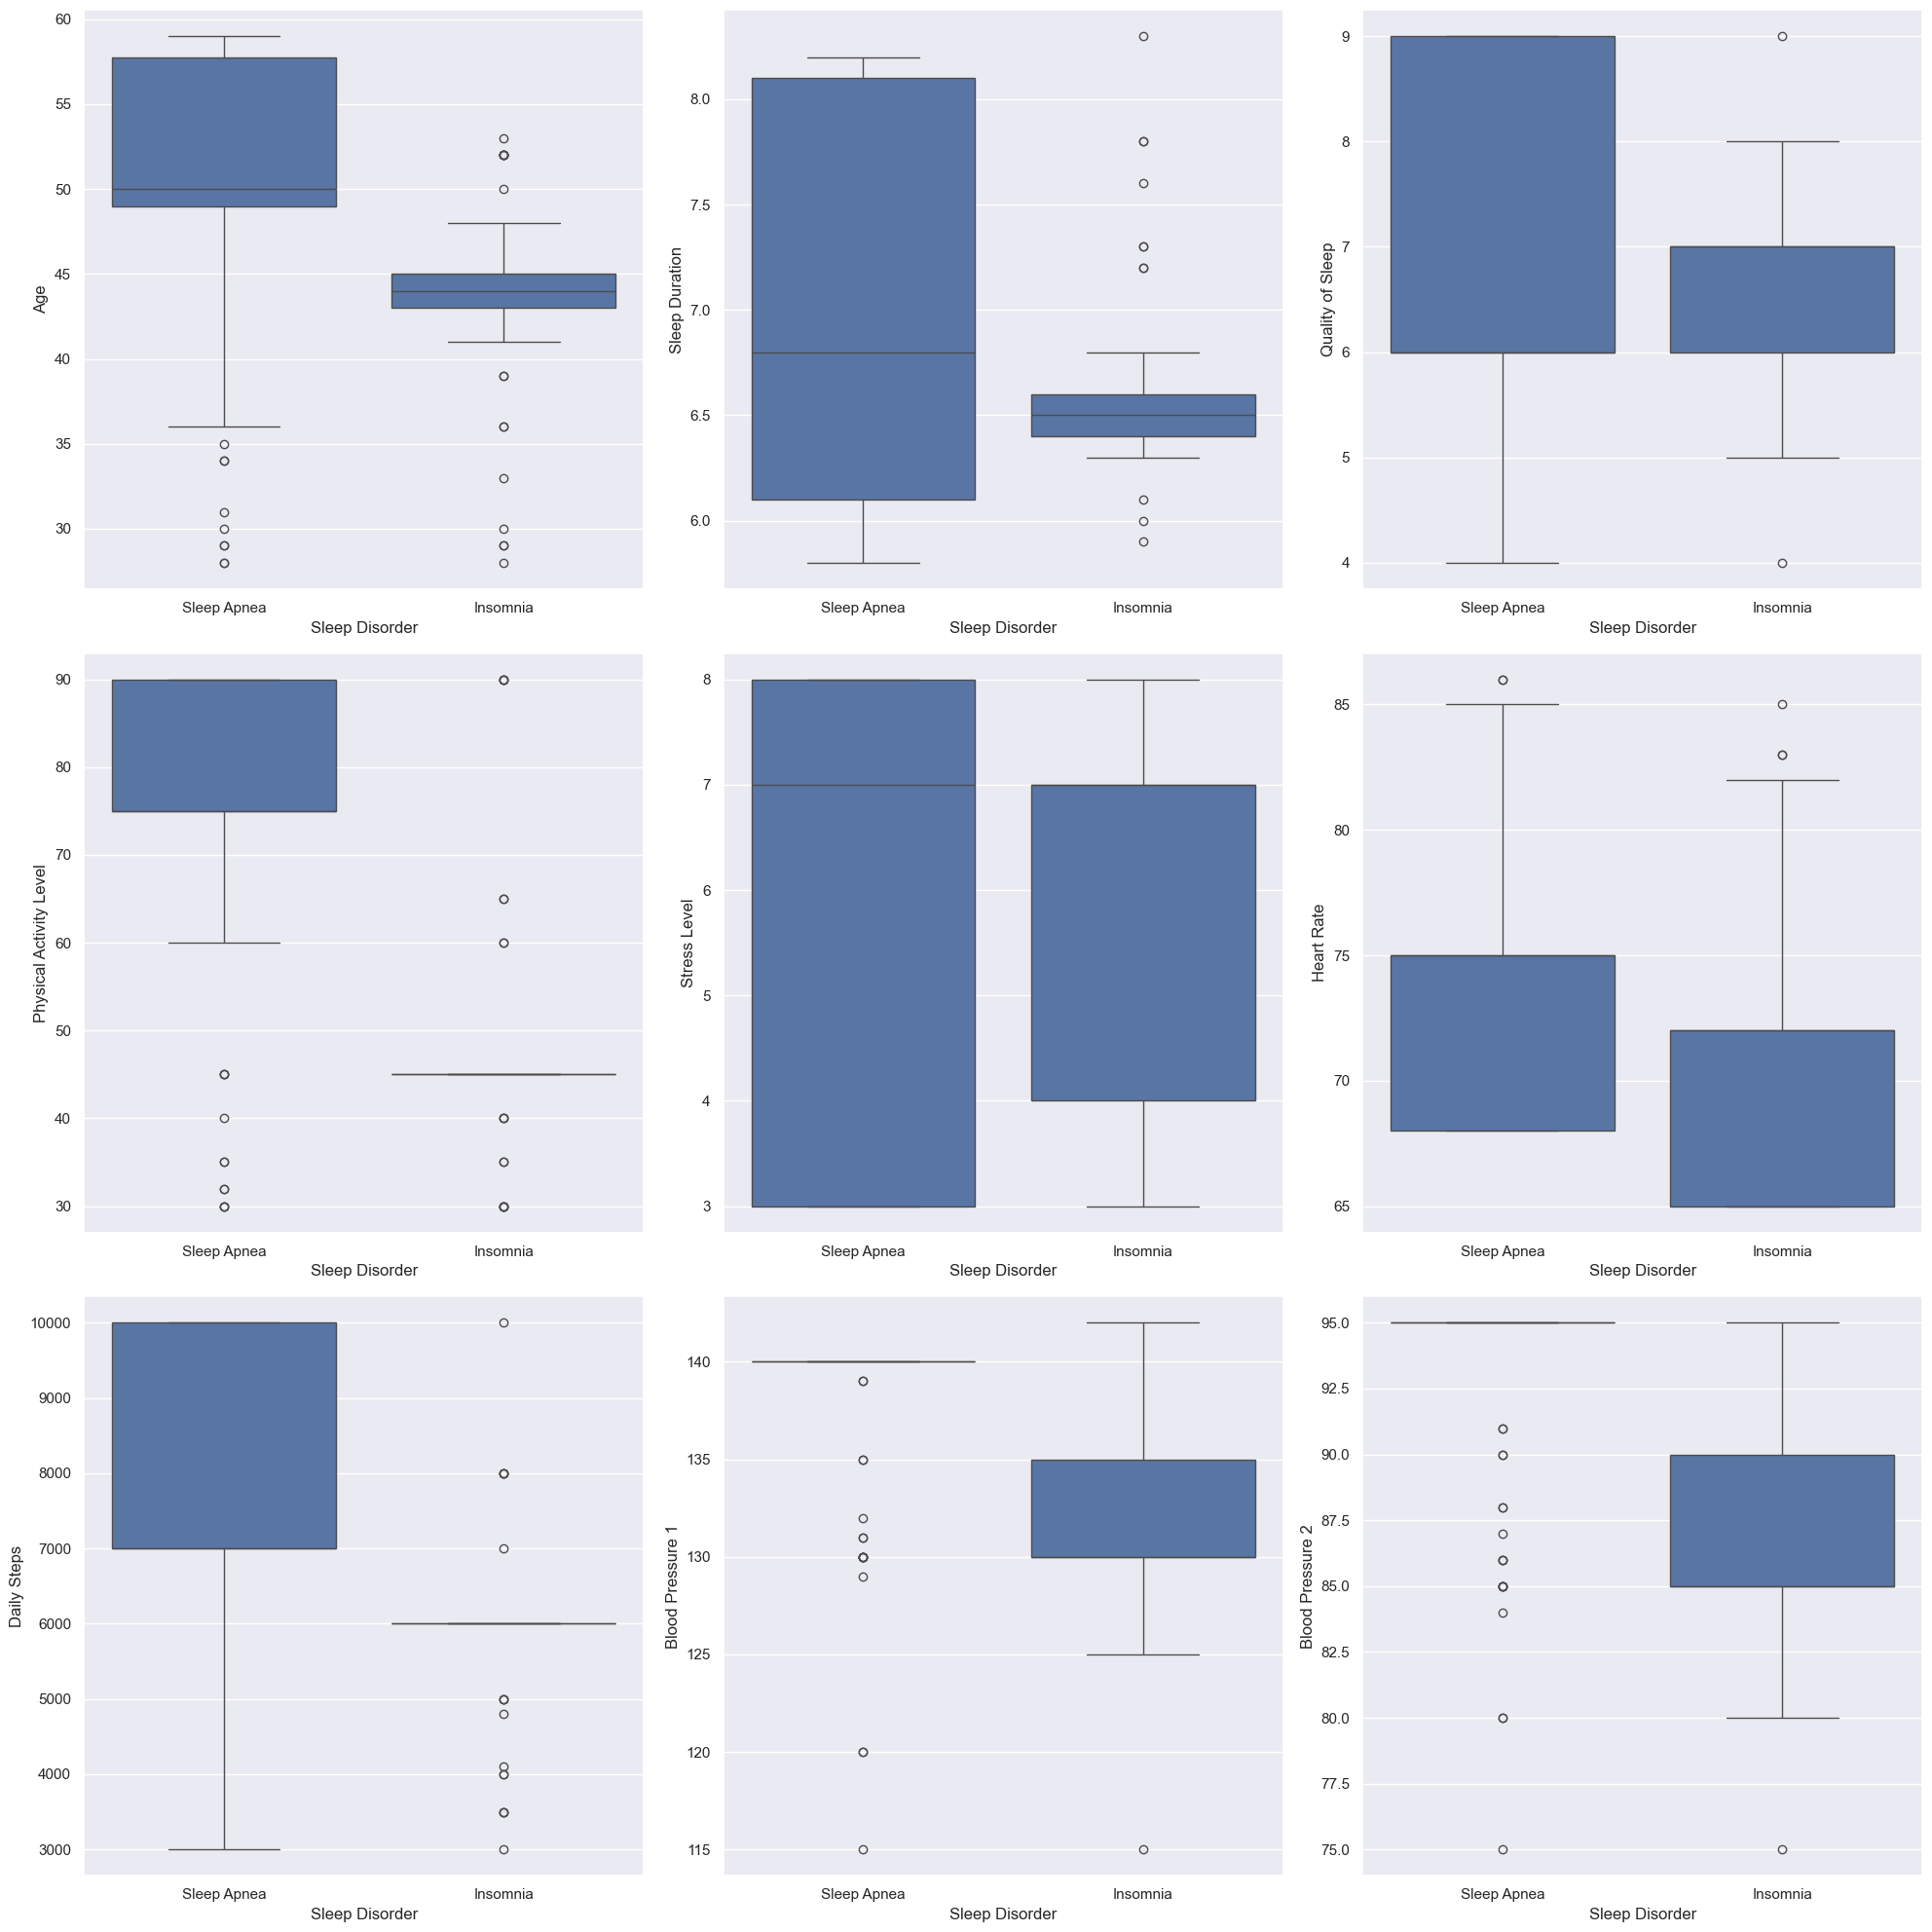

In [20]:
# Define numerical variables
num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
            'Stress Level', 'Heart Rate', 'Daily Steps', 'Blood Pressure 1', 'Blood Pressure 2']

# Create box plots for numerical variables against Sleep Disorder
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x="Sleep Disorder", data=df, ax=axs[i])

fig.tight_layout()
plt.show()

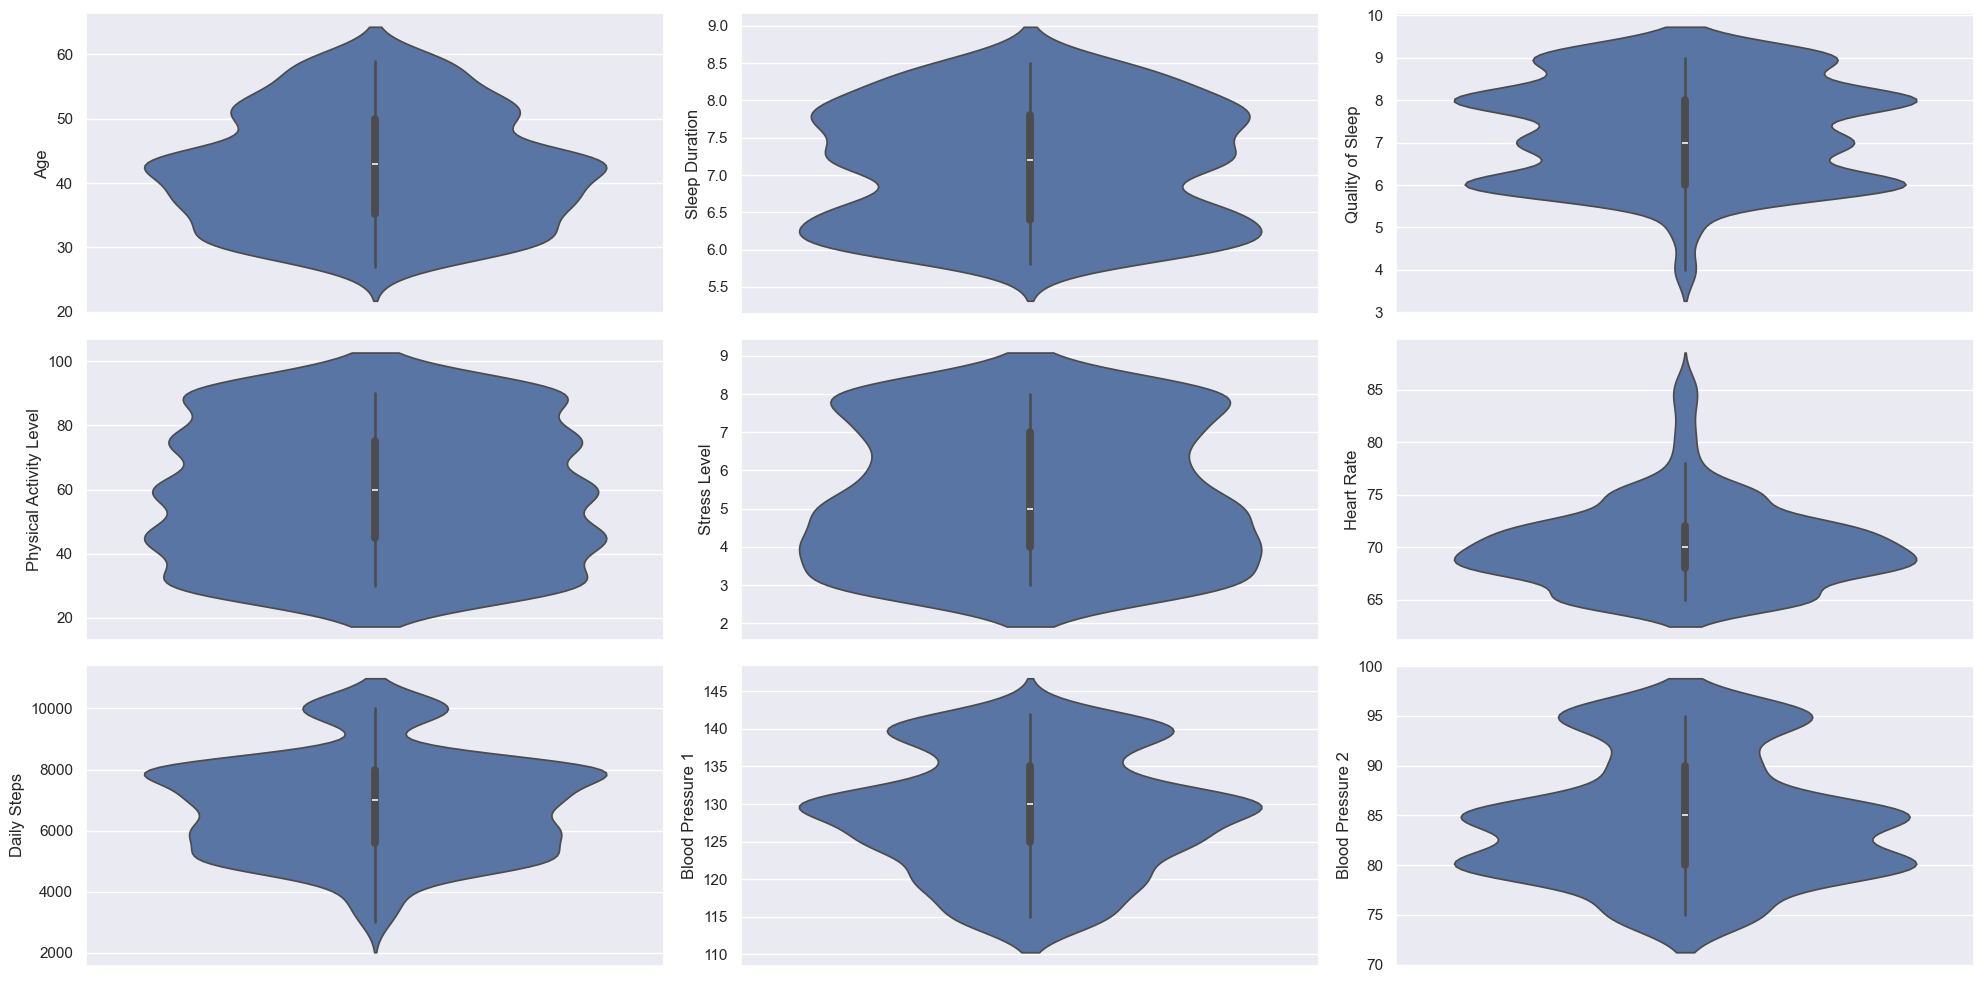

In [21]:
# Define numerical variables
num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
            'Stress Level', 'Heart Rate', 'Daily Steps', 'Blood Pressure 1', 'Blood Pressure 2']

# Create violin plots for numerical variables
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

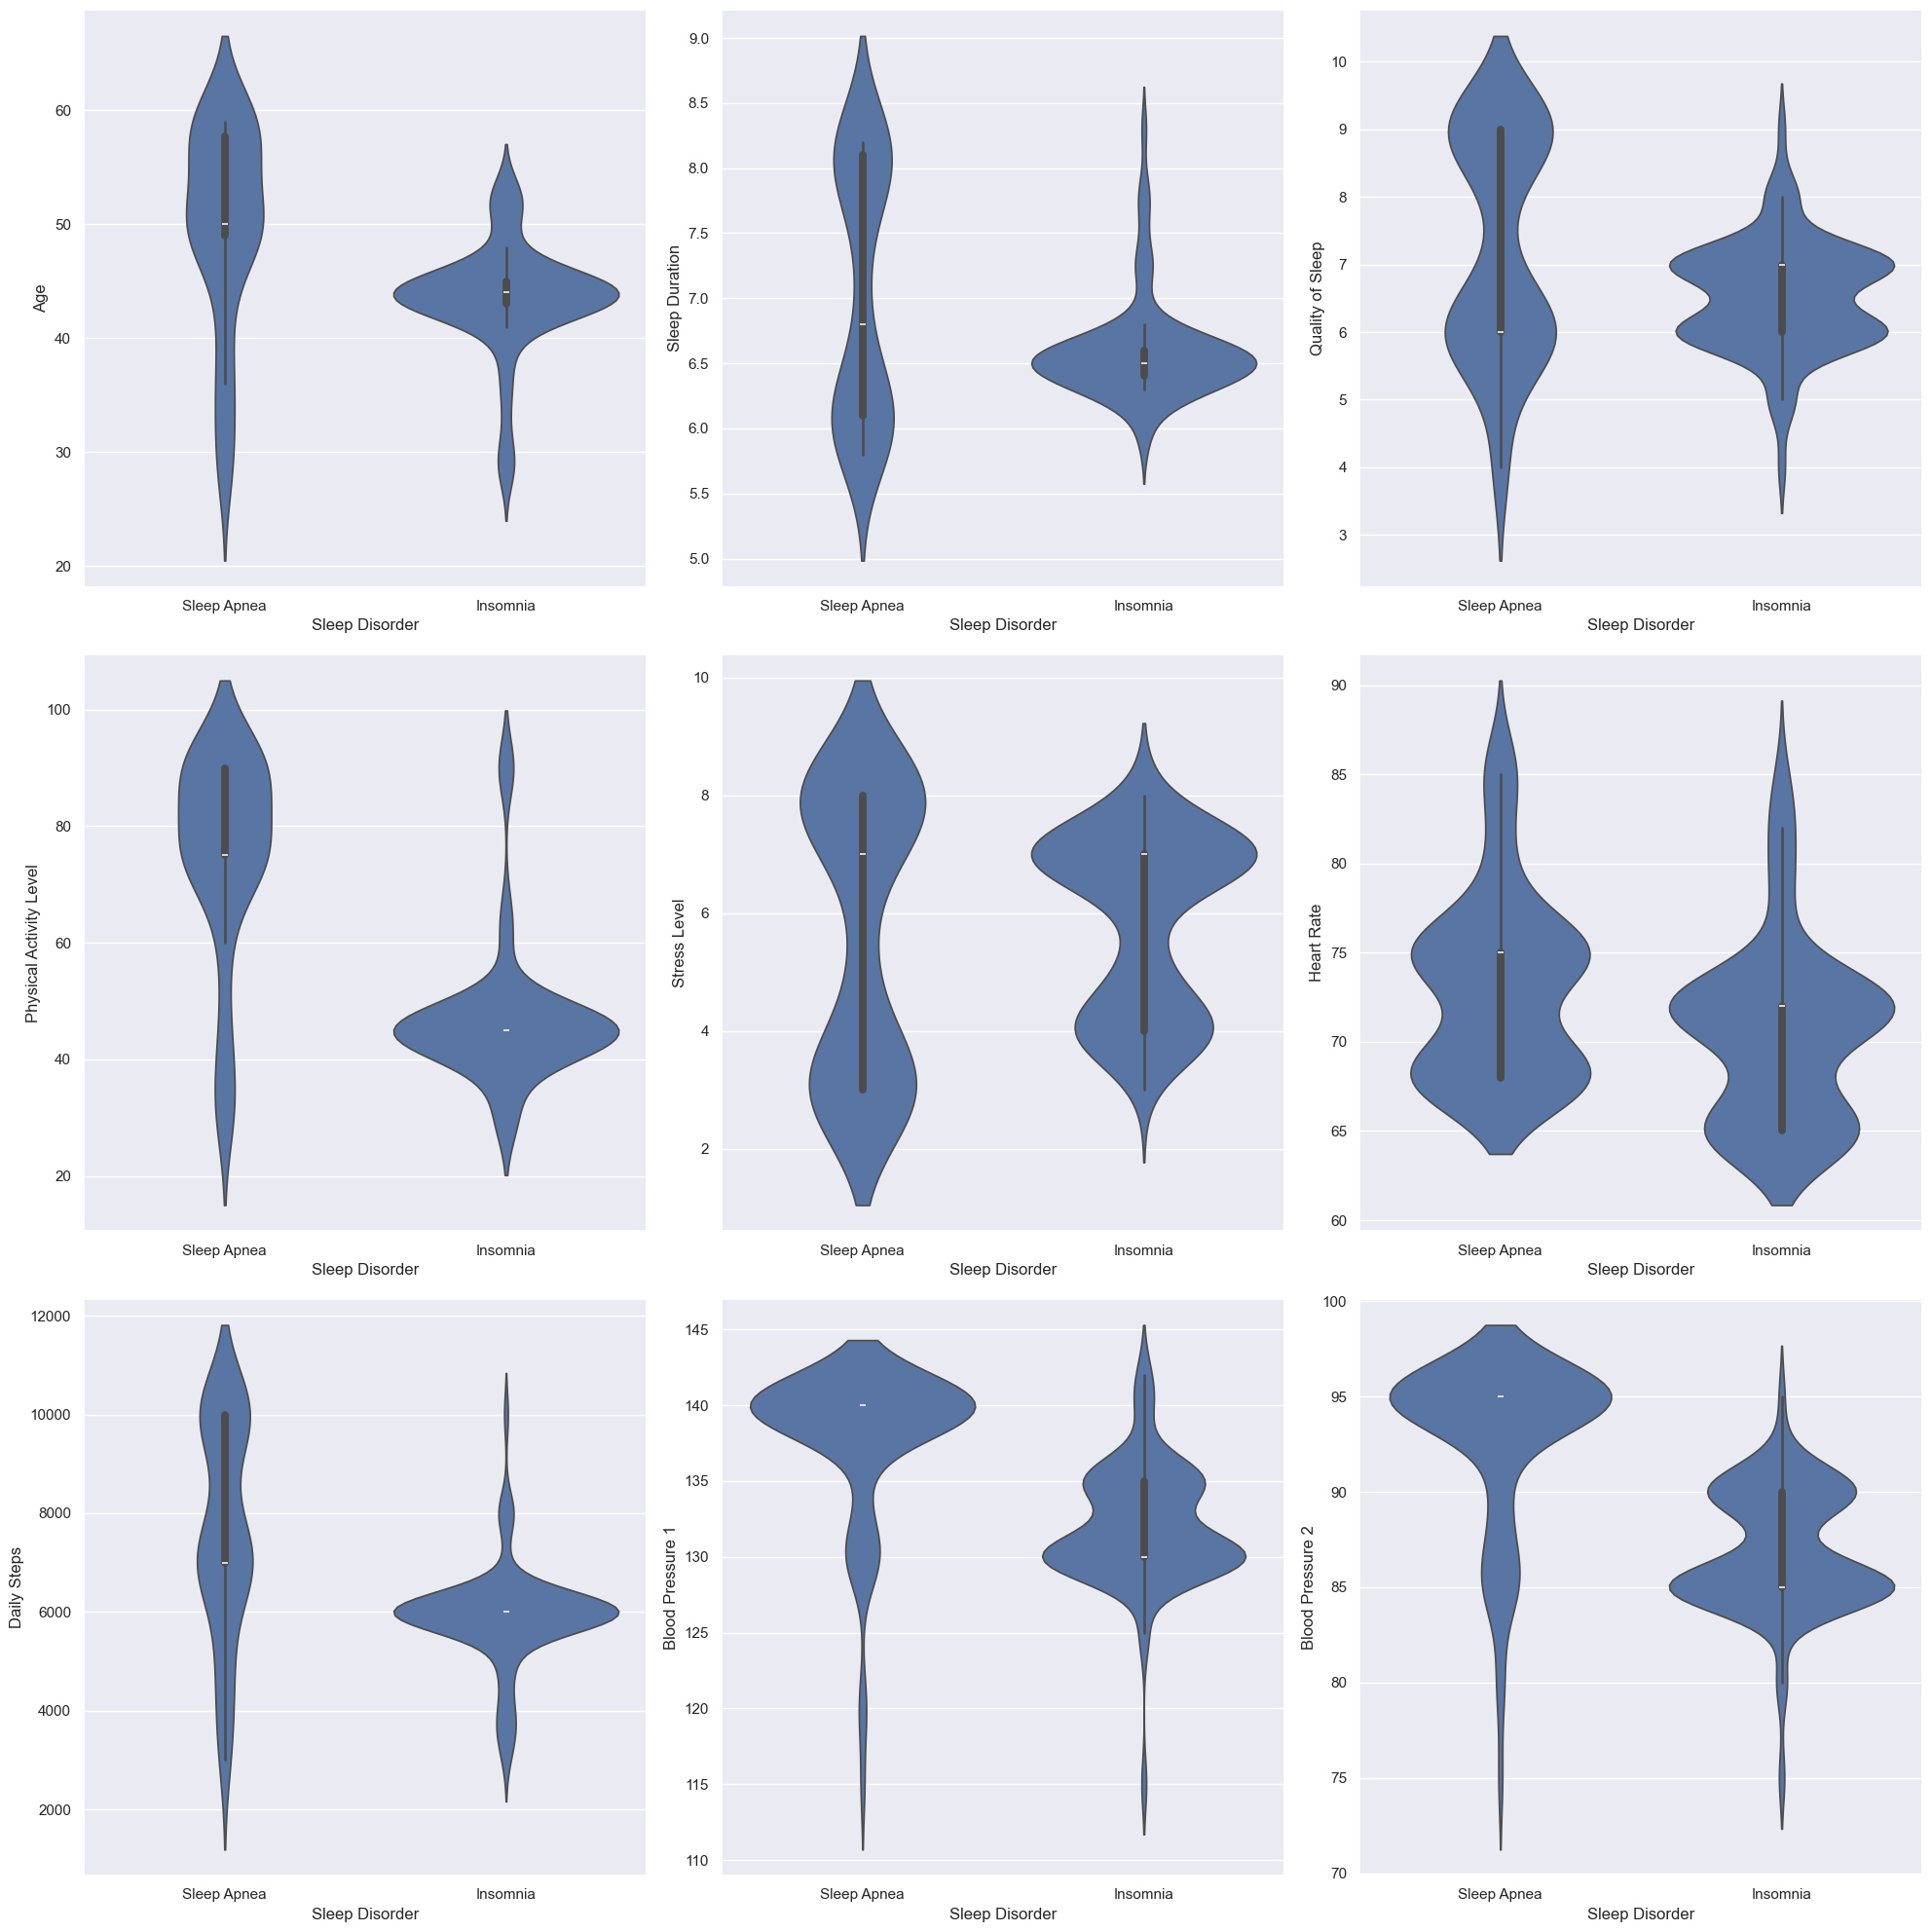

In [22]:
# Define numerical variables
num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
            'Stress Level', 'Heart Rate', 'Daily Steps', 'Blood Pressure 1', 'Blood Pressure 2']

# Create subplots for violin plots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

# Generate violin plots for each variable categorized by 'Sleep Disorder'
for i, var in enumerate(num_vars):
    sns.violinplot(y=var, x="Sleep Disorder", data=df, ax=axs[i])

fig.tight_layout()
plt.show()

In [23]:
# Check missing values
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Sleep Disorder    58.55615
dtype: float64

In [24]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    # Print the column name and unique values
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal' 'Obese']
Sleep Disorder: [nan 'Sleep Apnea' 'Insomnia']


In [25]:
from sklearn import preprocessing

# Loop over each categorical column
for col in df.select_dtypes(include=['object']).columns:
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    df[col] = label_encoder.fit_transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Gender: [1 0]
Occupation: [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category: [2 0 1]
Sleep Disorder: [2 1 0]


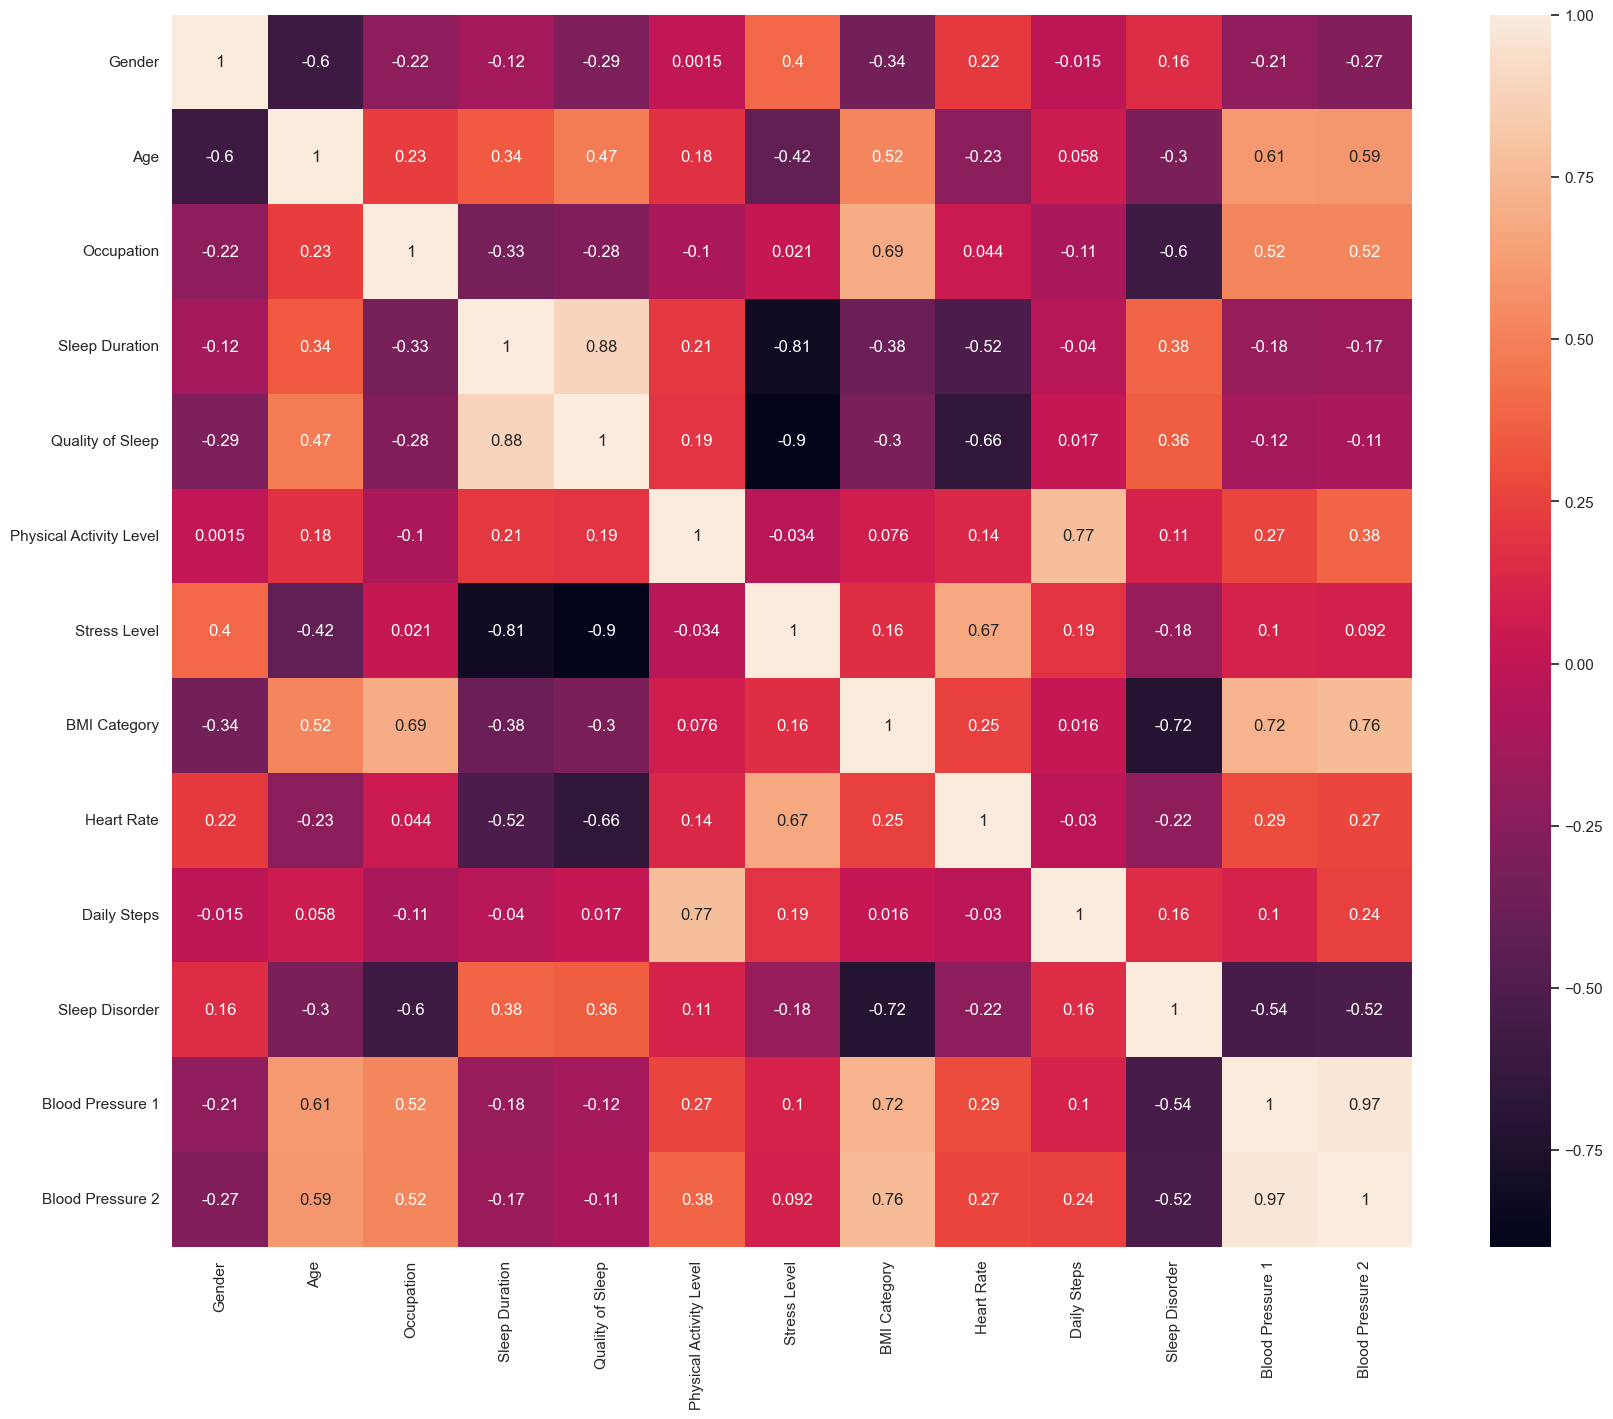

In [26]:

# Correlation Heatmap
plt.figure(figsize=(20, 16))  # Adjust figure size
sns.heatmap(df.corr(), fmt=".2g", annot=True)  # Create heatmap with annotations

plt.show()  # Display the heatmap

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split  # Import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
from scipy import stats  # ✅ Import stats from scipy
# Define the column for which you want to remove outliers
selected_columns = ['Heart Rate']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

print(f"Removed {len(outlier_indices)} outliers from the training set.")

Removed 5 outliers from the training set.


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize Decision Tree classifier with class balancing
dtree = DecisionTreeClassifier(class_weight='balanced')

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [0, 42]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Train the Decision Tree with best parameters
best_params = grid_search.best_params_
dtree = DecisionTreeClassifier(
    random_state=best_params['random_state'], 
    max_depth=best_params['max_depth'], 
    min_samples_leaf=best_params['min_samples_leaf'], 
    min_samples_split=best_params['min_samples_split'], 
    class_weight='balanced'
)
dtree.fit(X_train, y_train)

# Predict on test data
y_pred = dtree.predict(X_test)

# Calculate accuracy
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy:", accuracy, "%")

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
Accuracy: 88.0 %


In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

print("F1 Score: ", f1_score(y_test, y_pred, average="micro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="micro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="micro"))
print("Jaccard Score: ", jaccard_score(y_test, y_pred, average="micro"))

F1 Score:  0.88
Precision Score:  0.88
Recall Score:  0.88
Jaccard Score:  0.7857142857142857


In [33]:
# new_data = pd.DataFrame([{
#     'Gender': 'Male',
#     'Age': 25,
#     'Occupation': 'Engineer',
#     'Sleep Duration': 7,
#     'Quality of Sleep': 4,
#     'Physical Activity Level': 3,
#     'Stress Level': 2,
#     'BMI Category': 'Normal',
#     'Heart Rate': 72,
#     'Daily Steps': 8000,
#     'Blood Pressure 1': 120,
#     'Blood Pressure 2': 80
# }])

# prediction = dtree.predict(new_data)
# print("Predicted Output:", prediction)

In [34]:
print(y_train.unique())  # Dekho ki `y_train` ke andar kya values hain


[0 1 2]


In [35]:
print(y_train.value_counts())  # Har category ke kitne samples hain


Sleep Disorder
2    178
1     60
0     56
Name: count, dtype: int64


In [36]:
#  Project Overview (Introduction)
# "Heart Disease aur Sleep Disorder dono hi serious health concerns hain, jo ek dusre se interconnected hain. Studies dikhati hain ki poor sleep quality aur irregular sleep patterns se high blood pressure, irregular heart rate, obesity, aur stress levels badhne lagte hain, jo Heart Disease ka risk factor hain."

# 💡 Mera project is cheez ko analyze karta hai ki kya Sleep Disorder ek strong predictor ho sakta hai Heart Disease ka!

# 0 = No Sleep Disorder
# 1 = Mild Sleep Disorder
# 2 = Severe Sleep Disorder

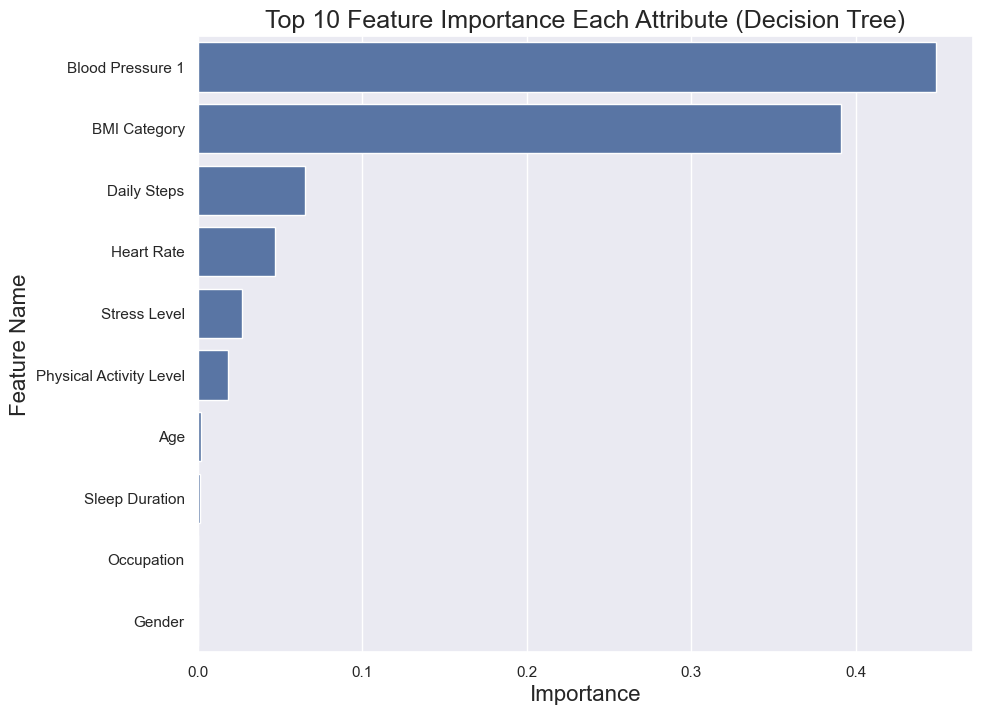

In [37]:
# Create a DataFrame of feature importances
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})

# Sort the DataFrame by importance (descending)
imp_df = imp_df.sort_values(by="Importance", ascending=False)

# Take the top 10 most important features
f1 = imp_df.head(10)

# Plot using seaborn
plt.figure(figsize=(10,8))
sns.barplot(data=f1, x="Importance", y="Feature Name")
plt.title("Top 10 Feature Importance Each Attribute (Decision Tree)", fontsize=18)
plt.xlabel("Importance", fontsize=16)
plt.ylabel("Feature Name", fontsize=16)
plt.show()

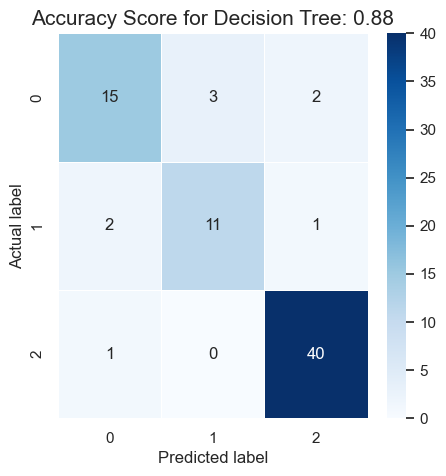

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='Blues', linewidths=.5)

# Labels and title
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy Score for Decision Tree: {:.2f}".format(dtree.score(X_test, y_test)), size=15)

# Show the plot
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define Random Forest Classifier with balanced class weights
rfc = RandomForestClassifier(class_weight='balanced')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'random_state': [0, 42]  # Random state for reproducibility
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [40]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest model using the best parameters
rfc_best = RandomForestClassifier(
    random_state=0, max_features='sqrt', n_estimators=100,max_depth=5, class_weight='balanced'
)
rfc_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [41]:


# Evaluate model performance
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score

print("Accuracy Score =", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("F-1 Score :", f1_score(y_test, y_pred, average="micro"))
print("Precision Score :", precision_score(y_test, y_pred, average="micro"))
print("Recall Score :", recall_score(y_test, y_pred, average="micro"))
print("Jaccard Score :", jaccard_score(y_test, y_pred, average="micro"))

Accuracy Score = 88.0 %
F-1 Score : 0.88
Precision Score : 0.88
Recall Score : 0.88
Jaccard Score : 0.7857142857142857


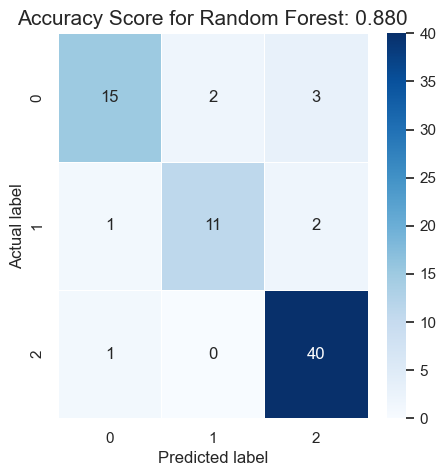

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)  # Make sure rfc is defined
rfc.fit(X_train, y_train)  # Train the model

# Predict the test set
y_pred = rfc.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, linewidths=.5, annot=True, cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Display accuracy score on the plot
all_sample_title = "Accuracy Score for Random Forest: {:.3f}".format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size=15)

plt.show()


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Features and Labels split (X = features, y = target)
# Assuming you already have X and y defined correctly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 3: Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 4: Print accuracy
print("Accuracy from Logistic Regression:", accuracy)


Accuracy from Logistic Regression: 0.8933333333333333


In [44]:
import joblib

# Save the trained model
joblib.dump(model, "lifestyle_model.pkl")

['lifestyle_model.pkl']